In [2]:
# -*- coding: utf-8 -*-
# import
import receiving_n_transforming_data as rtd
import dimensionality_reduction as drf
import classification as cls
print(rtd.func_list__)

['train_test_split', 'classification_report', 'confusion_matrix', 'accuracy_score', 'read_data_xlsx', 'lemmatize', 'del_stop_words', 'document_term_matrix', 'choce_from_data', 'reshape_testdata']


In [3]:
data = rtd.read_data_xlsx("data.xlsx")
name_tf_idf, annotation_tf_idf, labels = rtd.choce_from_data(data=data, tf_idf=True)     # Получение tf-idf матрицы для названий и аннотаций
# name_tf_idf, annotation_tf_idf    - списки [матрица документ-термин, термины]
# name_tf_idf = name_tf_idf[0]
# annotation_tf_idf = annotation_tf_idf[0]

In [4]:
# Проверяем сбалансированность выборки
print("Количество текстов по теме ИАД", labels.count(True))
print("Количество текстов по теме не ИАД", labels.count(False))

Количество текстов по теме ИАД 1583
Количество текстов по теме не ИАД 1836


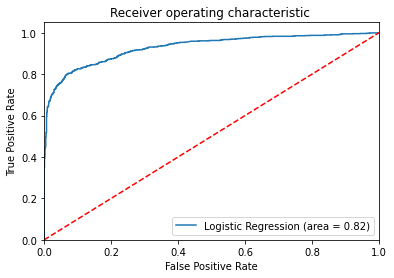

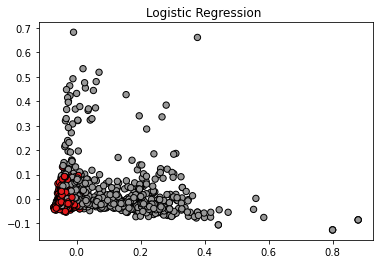

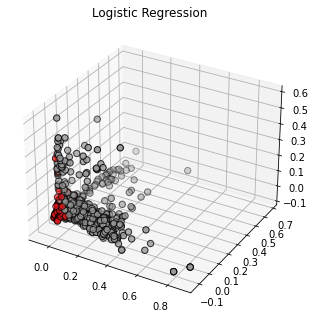

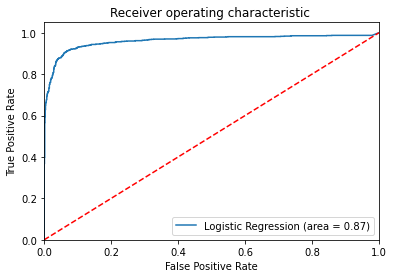

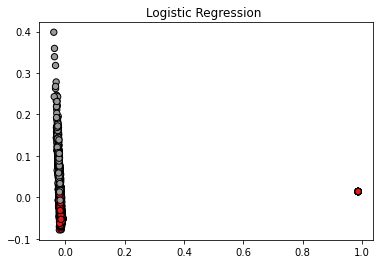

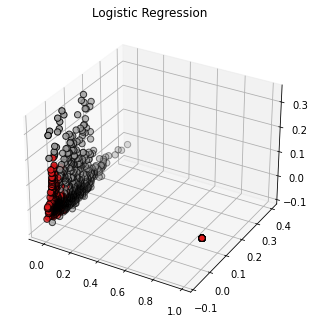

In [4]:
from sklearn.model_selection import train_test_split

file = open("Классификация без удаления малозначимых терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()

In [62]:
# Получение сокращенных матриц без файлов
df_name_tf_idf_short = drf.dimensionality_reduction_func(name_tf_idf)
df_annotation_tf_idf_short = drf.dimensionality_reduction_func(annotation_tf_idf)
name_tf_idf_short, terms_by_name = drf.df_to_list(df_name_tf_idf_short)
annotation_tf_idf_short, terms_by_annatation = drf.df_to_list(df_annotation_tf_idf_short)
# del df_name_tf_idf_short, df_annotation_tf_idf_short

In [5]:
# Получение матриц сокращенной размерности и терминов к матрицам ищ файлов
name_tf_idf_short, terms_by_name_short = drf.read_dimData_fromFiles(tf_idf_file="name_tf_idf_short.txt", terms_file="terms_by_name_short.txt")
annotation_tf_idf_short, terms_by_annatation_short = drf.read_dimData_fromFiles(tf_idf_file="annotation_tf_idf_short.txt", terms_file="terms_by_annatation_short.txt")

In [6]:
# Распределение данных на тренировочные и тестовые, сохранение их в файл
from sklearn.model_selection import train_test_split

x_train_N, x_test_N, y_train_N, y_test_N = train_test_split(name_tf_idf_short, labels, train_size=0.3, random_state=0)
x_train_A, x_test_A, y_train_A, y_test_A = train_test_split(annotation_tf_idf_short, labels, train_size=0.3, random_state=0)

file_testData = open("Тестовая выборка NAME.txt", 'w', encoding='utf-8')
[file_testData.write(str(x_test_N[i]) + '\n') for i in range(len(x_test_N))]
file_testData.close()

file_testData = open("Тестовая выборка ANNOTATION.txt", 'w', encoding='utf-8')
[file_testData.write(str(x_test_A[i]) + '\n') for i in range(len(x_test_A))]
file_testData.close()


file_testData = open("Тестовая выборка исходные метки NAME.txt", 'w', encoding='utf-8')
[file_testData.write(str(y_test_N[i]) + ' ') for i in range(len(y_test_N))]
file_testData.close()

file_testData = open("Тестовая выборка исходные метки ANNOTATION.txt", 'w', encoding='utf-8')
[file_testData.write(str(y_test_A[i]) + ' ') for i in range(len(y_test_A))]
file_testData.close()

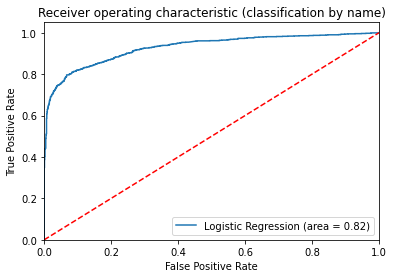

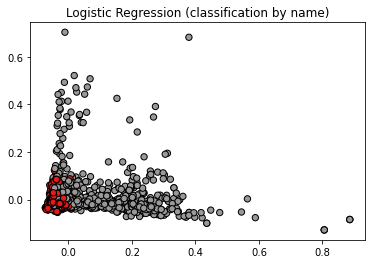

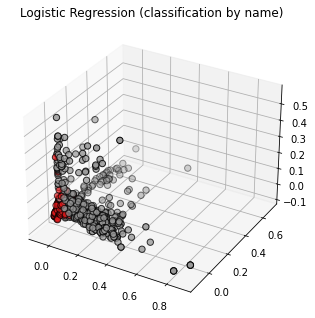

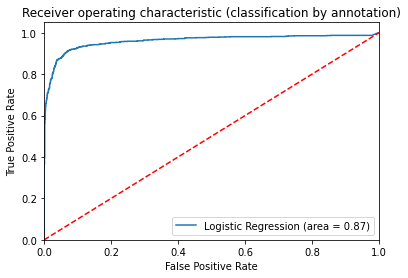

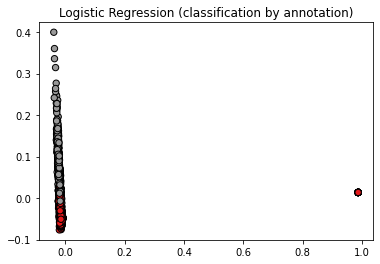

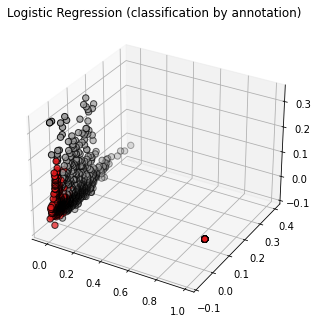

In [36]:
# Классификация c логистической регрессией с удалением малозначимых терминов// с графиками

file = open("Классификация с логистической регрессией удалением малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки логистической регрессии.txt", 'w', encoding='utf-8')

test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train_N, x_test_N, y_train_N, y_test_N, "(classification by name)")
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')


test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

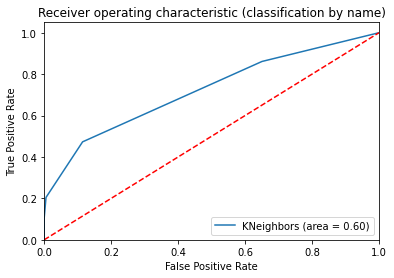

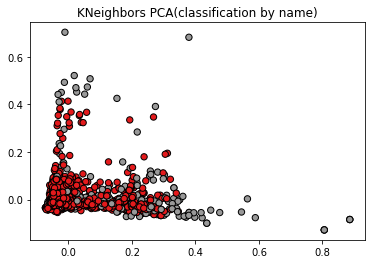

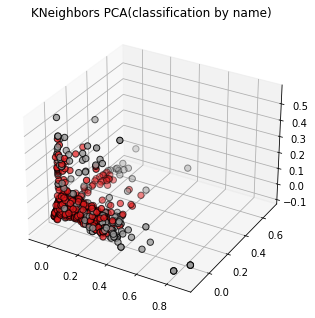

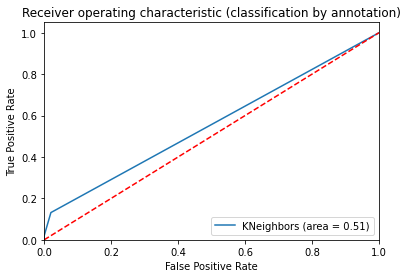

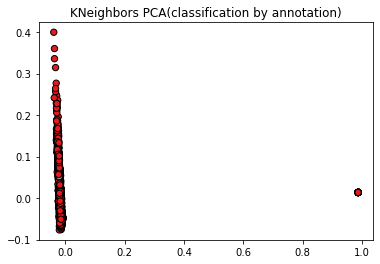

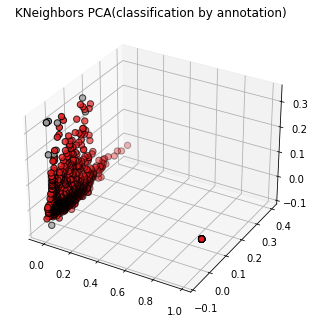

In [38]:
# Классификация c КБС с удалением малозначимых терминов// с графиками

file = open("Классификация КБС с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки КБС.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train_N, x_test_N, y_train_N, y_test_N, "(classification by name)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')

test_pred, classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

In [7]:
def rand_tree():
    # Классификация random tree с удалением малозначимых терминов// с графиками

    file = open("Классификация random tree с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

    file_predict = open("Метки random tree.txt", 'w', encoding='utf-8')

    test_pred, classificationReport, confusionMatrix, accuracy = cls.random_tree(X_train=x_train_N, X_test=x_test_N, y_train=y_train_N, y_test=y_test_N, label="(classification by name)",
    param={'criterion': ['entropy'], 'max_depth': list(range(100, 161, 10)), 'max_features': list(range(0, 71, 10))})
    file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
    test_pred = list(map(int, test_pred))
    [file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
    file_predict.write('\n')

    test_pred, classificationReport, confusionMatrix, accuracy = cls.random_tree(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)",
    {'criterion': ['gini'], 'max_depth': list(range(100, 201, 10)), 'max_features': list(range(0, 91, 10))})
    file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
    test_pred = list(map(int, test_pred))
    [file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

    file.close()
    file_predict.close()

In [8]:
def rand_forest():
    # Классификация random forest с удалением малозначимых терминов// с графиками

    file = open("Классификация random forest с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

    file_predict = open("Метки random forest.txt", 'w', encoding='utf-8')

    test_pred, classificationReport, confusionMatrix, accuracy = cls.random_forest(x_train_N, x_test_N, y_train_N, y_test_N, "(classification by name)")
    file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
    test_pred = list(map(int, test_pred))
    [file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
    file_predict.write('\n')

    test_pred, classificationReport, confusionMatrix, accuracy = cls.random_forest(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
    file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
    test_pred = list(map(int, test_pred))
    [file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

    file.close()
    file_predict.close()

c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must 

Обучение модели
Best_params random_tree (classification by name)
{'criterion': 'entropy', 'max_depth': 110, 'max_features': 60}
Decision Tree for (classification by name) 0.0 min 44.1679527759552 sec


c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must 

Обучение модели
Best_params random_tree (classification by annotation)
{'criterion': 'gini', 'max_depth': 170, 'max_features': 70}
Decision Tree for (classification by annotation) 7.0 min 48.69885730743408 sec
Обучение модели
Best_params Random Forest Classifier (classification by name)
{'criterion': 'gini', 'max_depth': 100, 'max_features': 50, 'n_estimators': 30}
Report
              precision    recall  f1-score   support

       False       0.83      0.93      0.88      1299
        True       0.91      0.78      0.84      1095

    accuracy                           0.86      2394
   macro avg       0.87      0.85      0.86      2394
weighted avg       0.86      0.86      0.86      2394

Decision Tree for (classification by name) 149.0 min 3.931683301925659 sec


KeyboardInterrupt: 

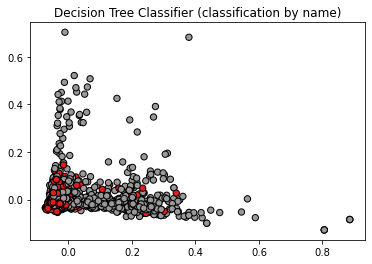

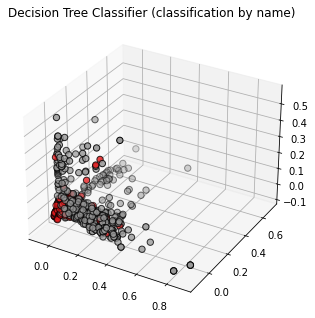

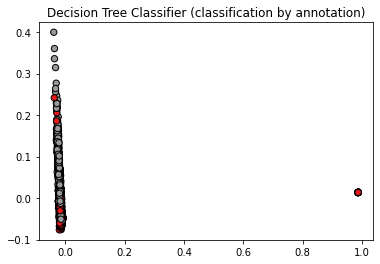

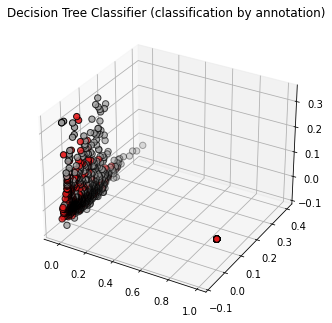

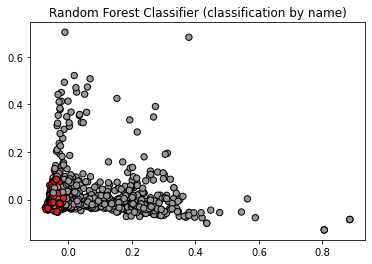

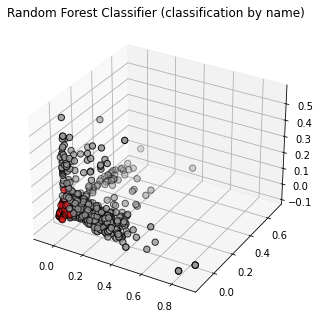

In [9]:
from threading import Thread

Thread(target=rand_tree).start()
Thread(target=rand_forest).start()

In [24]:
report = """              precision    recall  f1-score   support

       False       0.76      0.81      0.78      1299
        True       0.76      0.69      0.72      1095

    accuracy                           0.76      2394
   macro avg       0.76      0.75      0.75      2394
weighted avg       0.76      0.76      0.76      2394"""



In [26]:
cls.autoTable(report, "rnd tree ")